<p style="text-align:center">
    <a href="https://www.ict.mahidol.ac.th/en/" target="_blank">
    <img src="https://www3.ict.mahidol.ac.th/ICTSurveysV2/Content/image/MUICT2.png" width="400" alt="Faculty of ICT">
    </a>
</p>

# Lab13: Natural Disaster Detection from Social Media

This lab assignment challenges you to build a text classification model capable of identifying tweets related to natural disasters. You will work with the "Disaster Tweets" dataset, applying the data science pipeline from initial data exploration and preprocessing to model training, evaluation, and final deployment as an interactive web application using Streamlit. This assignment emphasizes practical application of text mining techniques for a real-world problem, requiring you to adapt and creatively utilize the knowledge gained from previous tutorials.

Upon successful completion of this lab assignment, you will be able to:

1. **Load and explore a social media text dataset**: Demonstrate the ability to load and understand the structure of a dataset containing tweets and their disaster relevance labels.
2. **Preprocess social media text data**: Apply appropriate text cleaning techniques, including handling URLs, mentions, and hashtags, along with standard preprocessing steps like tokenization, stop word removal, and lemmatization.
3. **Perform exploratory data analysis on social media text**: Analyze and visualize the characteristics of disaster-related and non-disaster-related tweets to identify potential distinguishing features.
4. **Implement and compare text representation methods**: Utilize TF-IDF and Bag-of-Words to convert tweet text into numerical features suitable for machine learning models.
5. **Select, train, and evaluate classification models for text data**: Train and compare the performance of at least two different classification algorithms (e.g., Naive Bayes, Logistic Regression) on the disaster detection task.
6. **Apply appropriate evaluation metrics for imbalanced classification**: Assess model performance using metrics such as accuracy, precision, recall, and macro-average F1 score.
7. **Select and save the best-performing model**: Choose the optimal model based on evaluation results and save it for deployment.
8. **Deploy a machine learning model as a Streamlit web application**: Create an interactive web application that allows users to input tweets and receive predictions on their relevance to natural disasters.
9. **Apply learned text classification concepts to a new domain**: Adapt and apply the skills and knowledge gained from previous tutorials to a novel and socially relevant text classification problem.

__Intructions:__
1. Append your ID at the end of this jupyter file name. For example, ```ITCS227_Lab13_Assignment_6788123.ipynb```
2. Complete each task in the lab.
3. Once finished, raise your hand to call a TA.
4. The TA will check your work and give you an appropriate score.
5. Submit the source code to MyCourse as record-keeping.

## Task 01: Data Processing and Exploratory Data Analysis (EDA)
In this task, you will begin by examining the "Disaster Tweets" dataset. First, you will need to identify and handle any missing values present in the data, considering the relevance of each column to the text analysis task. Next, you will implement a comprehensive text preprocessing pipeline specifically tailored for social media text. This will involve removing elements common in tweets such as URLs, user mentions, and hashtags (while potentially retaining the hashtag text). You will then apply standard text cleaning steps like removing punctuation, lowercasing, tokenization, stop word removal, and lemmatization. Finally, you will perform exploratory data analysis on the processed text. This includes generating word clouds to visually compare the most frequent terms in disaster-related and non-disaster-related tweets. You will also analyze and compare the average length of tweets in both categories to see if there are any distinguishing characteristics. This initial exploration will provide valuable insights into the textual differences between tweets about disasters and those that are not.

In [1]:
# !pip install swifter

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import swifter

nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

c:\Users\gifly\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [3]:
# Load the dataset
try:
    df = pd.read_csv('datasets/disaster_tweets.csv')
except FileNotFoundError:
    print("Error: 'train.csv' not found. Please download it from Kaggle and place it in the current directory.")
    exit()

In [4]:
# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [5]:
# Check the shape and data types
print("\nDataset shape:")
print(df.shape)
print("\nData types:")
print(df.info())


Dataset shape:
(11370, 5)

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB
None


In [6]:
# Check the distribution of the target variable ('target': 1 for disaster, 0 for not disaster)
print("\nTarget variable distribution:")
print(df['target'].value_counts())


Target variable distribution:
target
0    9256
1    2114
Name: count, dtype: int64


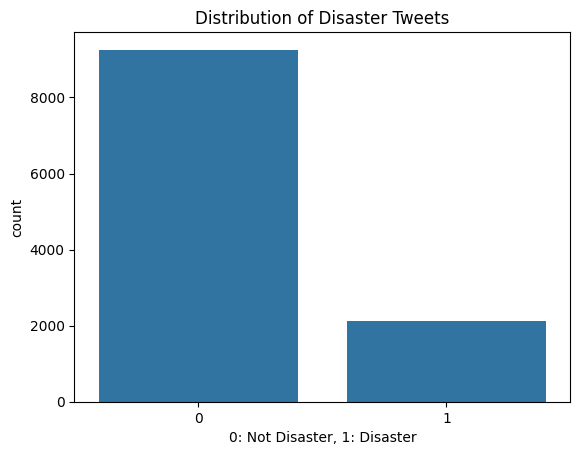

In [7]:
# Visualize the target variable distribution
sns.countplot(x='target', data=df)
plt.title('Distribution of Disaster Tweets')
plt.xlabel('0: Not Disaster, 1: Disaster')
plt.show()

### 1. **Handle Missing Values:** 
Check for missing values in the dataset. Decide on a strategy to handle them (e.g., imputation or removal) and implement it. Consider which columns might be important for your analysis.

*Hint:* Use `df.isnull().sum()` to check for missing values. Think about whether missing location or keyword information would prevent you from analyzing the tweet text.

In [8]:
#--------- Your Code Here ------------
print(df.isnull().sum())

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64


<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>

```python
print("\nMissing Values before handling:")
print(df.isnull().sum())
```
</details>

### 2. **Text Preprocessing:** 
Create a function to preprocess the 'text' column. This should include:
- Removing URLs (tweets often contain them).
- Removing mentions (@user).
- Removing hashtags (#topic, but you might consider keeping the text of the hashtag for now).
- Removing punctuation and special characters.
- Lowercasing the text.
- Tokenization.
- Removing stop words.
- Lemmatization.

*Hint:* You can use the `re` library for removing URLs, mentions, and punctuation. Remember to convert the stop words list to a set for faster lookups.

In [9]:
stopwords_set = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (keeping the text)
    text = re.sub(r'#(\w+)', r'\1', text)
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = text.split()
    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords_set]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

df['processed_text'] = df['text'].swifter.apply(preprocess_text)
print("\nPreprocessed text (first 5 rows):")
display(df[['text', 'processed_text']].head())

Pandas Apply: 100%|██████████| 11370/11370 [00:00<00:00, 20856.99it/s]


Preprocessed text (first 5 rows):


,text,processed_text
0,"Communal violence in Bhainsa, Telangana. ""Ston...",communal violence bhainsa telangana stone pelt...
1,Telangana: Section 144 has been imposed in Bha...,telangana section 144 imposed bhainsa january ...
2,Arsonist sets cars ablaze at dealership https:...,arsonist set car ablaze dealership
3,Arsonist sets cars ablaze at dealership https:...,arsonist set car ablaze dealership
4,"""Lord Jesus, your love brings freedom and pard...",lord jesus love brings freedom pardon fill hol...


<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>

```python
# 2. Text Preprocessing
stopwords_set = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (keeping the text)
    text = re.sub(r'#(\w+)', r'\1', text)
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = text.split()
    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords_set]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

df['processed_text'] = df['text'].swifter.apply(preprocess_text)
print("\nPreprocessed text (first 5 rows):")
display(df[['text', 'processed_text']].head())
```
</details>

### 3. Exploratory Data Analysis (EDA) of Text:
- Generate word clouds for tweets classified as disaster (target=1) and those not classified as disaster (target=0). This can help visualize the most frequent words in each category.
- Analyze the average length of tweets (number of words or characters) for both disaster and non-disaster tweets. Are there any noticeable differences?

*Hint:* You can create separate DataFrames for disaster and non-disaster tweets and then join their text to generate word clouds. For average length, you can create a new column with the length of the preprocessed text.

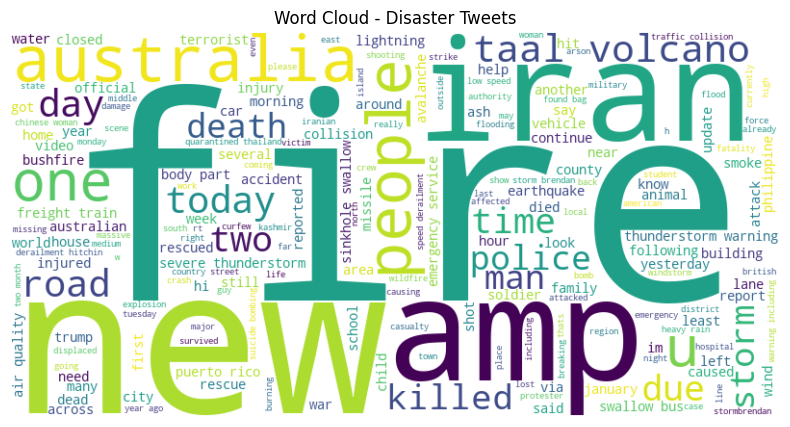

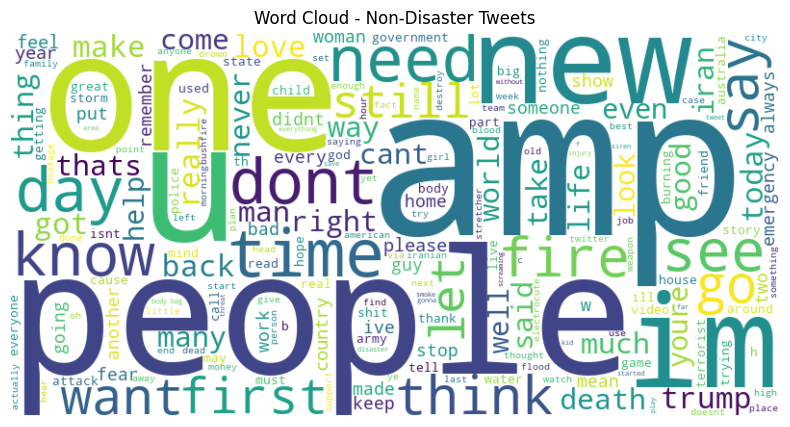


Average tweet length per category (number of words):
target
0     9.683773
1    10.821665
Name: tweet_length, dtype: float64


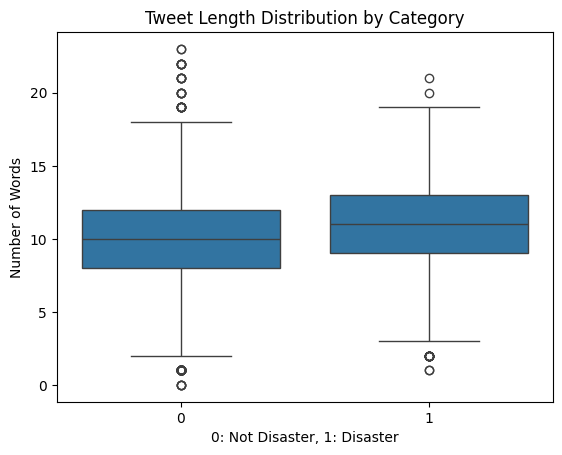

In [10]:
#--------- Your Code Here ------------
from wordcloud import WordCloud

# Word Cloud for disaster tweets
disaster_tweets = ' '.join(df[df['target'] == 1]['processed_text'])
wordcloud_disaster = WordCloud(width=800, height=400, background_color='white').generate(disaster_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_disaster, interpolation='bilinear')
plt.title('Word Cloud - Disaster Tweets')
plt.axis('off')
plt.show()

# Word Cloud for non-disaster tweets
non_disaster_tweets = ' '.join(df[df['target'] == 0]['processed_text'])
wordcloud_non_disaster = WordCloud(width=800, height=400, background_color='white').generate(non_disaster_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_disaster, interpolation='bilinear')
plt.title('Word Cloud - Non-Disaster Tweets')
plt.axis('off')
plt.show()

# Average tweet length
df['tweet_length'] = df['processed_text'].apply(lambda x: len(x.split()))
avg_length = df.groupby('target')['tweet_length'].mean()
print("\nAverage tweet length per category (number of words):")
print(avg_length)

sns.boxplot(x='target', y='tweet_length', data=df)
plt.title('Tweet Length Distribution by Category')
plt.xlabel('0: Not Disaster, 1: Disaster')
plt.ylabel('Number of Words')
plt.show()

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>

```python
# 3. Exploratory Data Analysis (EDA) of Text
from wordcloud import WordCloud

# Word Cloud for disaster tweets
disaster_tweets = ' '.join(df[df['target'] == 1]['processed_text'])
wordcloud_disaster = WordCloud(width=800, height=400, background_color='white').generate(disaster_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_disaster, interpolation='bilinear')
plt.title('Word Cloud - Disaster Tweets')
plt.axis('off')
plt.show()

# Word Cloud for non-disaster tweets
non_disaster_tweets = ' '.join(df[df['target'] == 0]['processed_text'])
wordcloud_non_disaster = WordCloud(width=800, height=400, background_color='white').generate(non_disaster_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_disaster, interpolation='bilinear')
plt.title('Word Cloud - Non-Disaster Tweets')
plt.axis('off')
plt.show()

# Average tweet length
df['tweet_length'] = df['processed_text'].apply(lambda x: len(x.split()))
avg_length = df.groupby('target')['tweet_length'].mean()
print("\nAverage tweet length per category (number of words):")
print(avg_length)

sns.boxplot(x='target', y='tweet_length', data=df)
plt.title('Tweet Length Distribution by Category')
plt.xlabel('0: Not Disaster, 1: Disaster')
plt.ylabel('Number of Words')
plt.show()
```
</details>

## Task 02: Text Representation and Classification Model Selection and Evaluation

In this task, you will convert the preprocessed tweet text into numerical features using two common techniques: TF-IDF and Bag-of-Words. You will then explore the impact of these different representations on the performance of various classification models. You are expected to select and train at least two distinct models (such as Naive Bayes, Logistic Regression, SVM, or Random Forest) using both TF-IDF and BoW features. For each model and feature combination, you will evaluate its performance on a held-out testing set using key classification metrics including accuracy, precision, recall, and, importantly, the macro-average F1 score. After evaluating all the combinations, you will compare the results and identify the best-performing model and feature representation based on the macro-average F1 score. Finally, you will provide a clear justification for your choice, considering the strengths and weaknesses of the different approaches. The best-performing model and its corresponding vectorizer will be saved for deployment in the subsequent task.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [12]:
# Split data into training and testing sets
X = df['processed_text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Text Representation:
Convert the preprocessed text in the 'processed_text' column into numerical features using at least two different text representation methods:
- TF-IDF (Term Frequency-Inverse Document Frequency)
- Bag-of-Words (BoW)

*Hint:* Use `TfidfVectorizer` and `CountVectorizer` from `sklearn.feature_extraction.text`. Remember to split your data into training and testing sets *before* fitting the vectorizers to avoid data leakage.

In [13]:
#--------- Your Code Here ------------
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("\nTF-IDF features created.")

# Bag-of-Words
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)
print("Bag-of-Words features created.")


TF-IDF features created.
Bag-of-Words features created.


<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>

```python
# 1. Text Representation
# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("\nTF-IDF features created.")

# Bag-of-Words
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)
print("Bag-of-Words features created.")
```

</details>

### 2. Classification Model Selection: 
Choose at least two different classification models to train on the disaster detection task. Consider models that performed well in the sentiment analysis tutorial or others you think might be suitable for this task. Examples include:
- Multinomial Naive Bayes
- Logistic Regression with `max_iter=1000`
- Support Vector Machines (SVC) with `kernel='linear', probability=True`
- Random Forest with `n_jobs=-1`

In [14]:
#--------- Your Code Here ------------
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_jobs=-1)
}

results = {}

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```python

# 2. Classification Model Selection
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(n_jobs=-1)
}

results = {}
```
</details>

### 3. Model Training and Evaluation:
- Train each of your chosen classification models using both the TF-IDF and BoW features on the training data.
- Evaluate the performance of each model on the testing data using appropriate metrics, including:
- Accuracy
- Precision
- Recall
- Macro-average F1 score (as used in the tutorial)
- Print the evaluation metrics for each model and feature representation.

*Hint:* Use `train_test_split` from `sklearn.model_selection`. For evaluation, use functions from `sklearn.metrics` like `accuracy_score`, `precision_score`, `recall_score`, and `f1_score`.

In [15]:
#--------- Your Code Here ------------
for name, model in models.items():
    print(f"\n--- Training and Evaluating {name} ---")

    # Train and evaluate with TF-IDF
    model.fit(X_train_tfidf, y_train)
    y_pred_tfidf = model.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    precision_tfidf = precision_score(y_test, y_pred_tfidf, average='macro')
    recall_tfidf = recall_score(y_test, y_pred_tfidf, average='macro')
    f1_tfidf = f1_score(y_test, y_pred_tfidf, average='macro')
    results[f'{name} (TF-IDF)'] = {'accuracy': accuracy_tfidf, 'precision': precision_tfidf, 'recall': recall_tfidf, 'f1': f1_tfidf}
    print(f"TF-IDF - Accuracy: {accuracy_tfidf:.4f}, Precision: {precision_tfidf:.4f}, Recall: {recall_tfidf:.4f}, F1: {f1_tfidf:.4f}")

    # Train and evaluate with BoW
    model.fit(X_train_bow, y_train)
    y_pred_bow = model.predict(X_test_bow)
    accuracy_bow = accuracy_score(y_test, y_pred_bow)
    precision_bow = precision_score(y_test, y_pred_bow, average='macro')
    recall_bow = recall_score(y_test, y_pred_bow, average='macro')
    f1_bow = f1_score(y_test, y_pred_bow, average='macro')
    results[f'{name} (BoW)'] = {'accuracy': accuracy_bow, 'precision': precision_bow, 'recall': recall_bow, 'f1': f1_bow}
    print(f"BoW    - Accuracy: {accuracy_bow:.4f}, Precision: {precision_bow:.4f}, Recall: {recall_bow:.4f}, F1: {f1_bow:.4f}")


--- Training and Evaluating Naive Bayes ---
TF-IDF - Accuracy: 0.8641, Precision: 0.9137, Recall: 0.6128, F1: 0.6460
BoW    - Accuracy: 0.8975, Precision: 0.8327, Recall: 0.7935, F1: 0.8109

--- Training and Evaluating Logistic Regression ---
TF-IDF - Accuracy: 0.8852, Precision: 0.8815, Recall: 0.6924, F1: 0.7402
BoW    - Accuracy: 0.9024, Precision: 0.8579, Recall: 0.7785, F1: 0.8099

--- Training and Evaluating SVM ---
TF-IDF - Accuracy: 0.8989, Precision: 0.8500, Recall: 0.7724, F1: 0.8031
BoW    - Accuracy: 0.8896, Precision: 0.8121, Recall: 0.7937, F1: 0.8024

--- Training and Evaluating Random Forest ---
TF-IDF - Accuracy: 0.8940, Precision: 0.8761, Recall: 0.7276, F1: 0.7734
BoW    - Accuracy: 0.8945, Precision: 0.8907, Recall: 0.7199, F1: 0.7690


<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>

```python
# 3. Model Training and Evaluation
for name, model in models.items():
    print(f"\n--- Training and Evaluating {name} ---")

    # Train and evaluate with TF-IDF
    model.fit(X_train_tfidf, y_train)
    y_pred_tfidf = model.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    precision_tfidf = precision_score(y_test, y_pred_tfidf, average='macro')
    recall_tfidf = recall_score(y_test, y_pred_tfidf, average='macro')
    f1_tfidf = f1_score(y_test, y_pred_tfidf, average='macro')
    results[f'{name} (TF-IDF)'] = {'accuracy': accuracy_tfidf, 'precision': precision_tfidf, 'recall': recall_tfidf, 'f1': f1_tfidf}
    print(f"TF-IDF - Accuracy: {accuracy_tfidf:.4f}, Precision: {precision_tfidf:.4f}, Recall: {recall_tfidf:.4f}, F1: {f1_tfidf:.4f}")

    # Train and evaluate with BoW
    model.fit(X_train_bow, y_train)
    y_pred_bow = model.predict(X_test_bow)
    accuracy_bow = accuracy_score(y_test, y_pred_bow)
    precision_bow = precision_score(y_test, y_pred_bow, average='macro')
    recall_bow = recall_score(y_test, y_pred_bow, average='macro')
    f1_bow = f1_score(y_test, y_pred_bow, average='macro')
    results[f'{name} (BoW)'] = {'accuracy': accuracy_bow, 'precision': precision_bow, 'recall': recall_bow, 'f1': f1_bow}
    print(f"BoW    - Accuracy: {accuracy_bow:.4f}, Precision: {precision_bow:.4f}, Recall: {recall_bow:.4f}, F1: {f1_bow:.4f}")
```
</details>

### 4. Model Comparison and Selection: 
Based on the evaluation results, compare the performance of the different models and feature representations. Identify the best-performing combination based on the macro-average F1 score. Justify your choice.

In [16]:
#--------- Your Code Here ------------
print("\n--- Model Comparison ---")
best_model_name = None
best_f1_score = -1

for name, metrics in results.items():
    print(f"{name}: F1 Score = {metrics['f1']:.4f}")
    if metrics['f1'] > best_f1_score:
        best_f1_score = metrics['f1']
        best_model_name = name

print(f"\nBest Performing Model (based on Macro-average F1 Score): {best_model_name} with F1 Score = {best_f1_score:.4f}")


--- Model Comparison ---
Naive Bayes (TF-IDF): F1 Score = 0.6460
Naive Bayes (BoW): F1 Score = 0.8109
Logistic Regression (TF-IDF): F1 Score = 0.7402
Logistic Regression (BoW): F1 Score = 0.8099
SVM (TF-IDF): F1 Score = 0.8031
SVM (BoW): F1 Score = 0.8024
Random Forest (TF-IDF): F1 Score = 0.7734
Random Forest (BoW): F1 Score = 0.7690

Best Performing Model (based on Macro-average F1 Score): Naive Bayes (BoW) with F1 Score = 0.8109


<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>

```python
# 4. Model Comparison and Selection
print("\n--- Model Comparison ---")
best_model_name = None
best_f1_score = -1

for name, metrics in results.items():
    print(f"{name}: F1 Score = {metrics['f1']:.4f}")
    if metrics['f1'] > best_f1_score:
        best_f1_score = metrics['f1']
        best_model_name = name

print(f"\nBest Performing Model (based on Macro-average F1 Score): {best_model_name} with F1 Score = {best_f1_score:.4f}")
```
</details>

### 5. Save the Best Model
For the next task, we will choose the best model and its corresponding vectorizer. Save the model as `disaster_detection_model.joblib`.

In [17]:
#--------- Your Code Here ------------
best_vectorizer = tfidf_vectorizer if 'TF-IDF' in best_model_name else bow_vectorizer
best_model = models[best_model_name.split(' (')[0]] # Extract model name (e.g., 'Naive Bayes')

# Save the best model and vectorizer (this will be used in Task 03)
import joblib
joblib.dump((best_model, best_vectorizer), 'disaster_detection_model.joblib')
print("\nBest model and vectorizer saved as 'disaster_detection_model.joblib'")


Best model and vectorizer saved as 'disaster_detection_model.joblib'


<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>

```python
#Let's assume, based on the results, that 'Naive Bayes (BoW)' performed best.
best_vectorizer = tfidf_vectorizer if 'TF-IDF' in best_model_name else bow_vectorizer
best_model = models[best_model_name.split(' (')[0]] # Extract model name (e.g., 'Naive Bayes')

# Save the best model and vectorizer (this will be used in Task 03)
import joblib
joblib.dump((best_model, best_vectorizer), 'disaster_detection_model.joblib')
print("\nBest model and vectorizer saved as 'disaster_detection_model.joblib'")
```
</details>

## Task 03: Model Deployment with Streamlit

In this final task, you will deploy the best-performing natural disaster detection model you selected and saved in Task 02 as an interactive web application using Streamlit. You will create a Python script (app.py) that loads your saved model and vectorizer. You will then build a user-friendly interface with a text area for users to input tweets and a button to trigger the prediction. Upon clicking the button, the application will preprocess the input tweet, use the loaded model to predict whether it relates to a natural disaster, and display the prediction (e.g., "Disaster" or "Not Disaster") to the user. As an optional enhancement, if your chosen model supports probability estimation, you can also display the probability scores associated with each prediction. This task will demonstrate your ability to take a trained machine learning model and make it accessible for real-world use through a web interface. Remember to follow the instructions to run your Streamlit application from the terminal.

### 1. Create a Streamlit App:
Create a Python file named `app_disaster.py` in the same directory as your Jupyter Notebook. This file will contain the code for your Streamlit web application.

### 2. Load the Saved Model and Vectorizer: 
In your `app_disaster.py` file, load the best-performing model and its corresponding vectorizer that you saved in Task 02 using `joblib.load()`.

*Hint:* Ensure that the filename in `joblib.load()` matches the filename you used in Task 02 (e.g., 'disaster_detection_model.joblib').

### 3. Implement Text Preprocessing in Streamlit: 
Include the same `preprocess_text()` function from Task 01 in your `app_disaster.py` file. This will be necessary to preprocess the user's input.

### 4. Create a User Interface: 
Use Streamlit elements (e.g., `st.title()`, `st.text_area()`, `st.button()`, `st.write()`) to build a simple web interface that allows users to:
- Enter text (a tweet).
- Click a button to get a prediction.
- Display the predicted class (Disaster or Not Disaster) and potentially the probability (if your chosen model supports it).

*Hint:* Use `st.text_area()` for the user to input the tweet. Use `st.button()` to trigger the prediction. Use `st.write()` to display the result. If your model has a `predict_proba()` method, you can access the probabilities. Remember to map the numerical prediction (0 or 1) back to a human-readable label.

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>
    
```python  
    
# app_disaster.py
import streamlit as st
import joblib
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#(\w+)', r'\1', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Load the saved model and vectorizer
try:
    model, vectorizer = joblib.load('disaster_detection_model.joblib')
except FileNotFoundError:
    st.error("Error: 'disaster_detection_model.joblib' not found. Make sure you have run Task 02 and saved the model.")
    st.stop()

st.title('Natural Disaster Tweet Detector')

user_input = st.text_area("Enter a tweet to check for disaster relevance:")

if st.button('Predict'):
    if user_input:
        processed_input = preprocess_text(user_input)
        vectorized_input = vectorizer.transform([processed_input])
        prediction = model.predict(vectorized_input)[0]

        if prediction == 1:
            st.warning("This tweet is predicted to be about a natural disaster.")
        else:
            st.success("This tweet is predicted to NOT be about a natural disaster.")

        # Optional: Display probability if the model has predict_proba
        if hasattr(model, 'predict_proba'):
            probabilities = model.predict_proba(vectorized_input)[0]
            prob_disaster = probabilities[1] * 100
            prob_not_disaster = probabilities[0] * 100
            st.write(f"Probability of being a disaster tweet: {prob_disaster:.2f}%")
            st.write(f"Probability of not being a disaster tweet: {prob_not_disaster:.2f}%")
    else:
        st.warning("Please enter a tweet.")
```	
</details>


### 5. Run the Streamlit App:
Make sure that the model file (`disaster_detection_model.joblib`) is in the intended location. Run `streamlit run app_disaster.py` file from the terminal.

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>

Instructions for Running the Streamlit App (to be included in the Jupyter Notebook):

- Save the code above into a file named app_disaster.py in the same directory as your Jupyter Notebook and the saved disaster_detection_model.joblib file.
- Open your terminal or command prompt.
- Navigate to the directory where you saved app_disaster.py.
- Run the Streamlit app using the command: streamlit run app_disaster.py
- Your web browser should automatically open with the Natural Disaster Tweet Detector application. You can then enter tweets and click the "Predict" button to see the model's prediction.
</details>

### Deliverables
Along with this Notebook file, please submit the followings:
* The app_disaster.py script containing your Streamlit application.
* A screenshot of your running Streamlit application displaying a successful prediction.

<p style="text-align:center;">That's it! Congratulations! <br> 
    Now, call an LA to check your solution. Then, upload your code on MyCourses.</p>